# OpenCV Quick Tests

This notebook exercises a few OpenCV functions on images inside `../test_sample` (relative to this notebook).

It will: list sample files, load images, convert color spaces, resize, apply Gaussian blur, run Canny edge detection, find contours and draw bounding boxes, and display results.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [2]:
TEST_DIR = Path("../test_sample").resolve()
OUTPUT_DIR = Path("../test_sample_opencv_out")
OUTPUT_DIR.mkdir(exist_ok=True)

def show_images(images, titles=None, figsize=(15,5)):
    n = len(images)
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        ax = plt.subplot(1, n, i+1)
        if img.ndim == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        plt.axis('off')
        if titles and i < len(titles):
            ax.set_title(titles[i])
    plt.tight_layout()

In [3]:
# List image files in the test folder
if not TEST_DIR.exists():
    raise FileNotFoundError(f"Test folder not found: {TEST_DIR}")

img_paths = sorted([p for p in TEST_DIR.iterdir() if p.suffix.lower() in ['.jpg','.jpeg','.png']])
print(f"Found {len(img_paths)} images in {TEST_DIR}")
for p in img_paths[:10]:
    print('-', p.name)

Found 1 images in /home/ngbao/Projects/bird_detector/test_sample
- Flock_of_Birds_(7175071318).jpg


In [4]:
def process_image(path, max_size=800, show=True):
    # Read image (BGR)
    img_bgr = cv2.imread(str(path))
    if img_bgr is None:
        print('Failed to read', path)
        return None
    # Convert to RGB for display
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    scale = min(1.0, max_size / max(h, w))
    if scale < 1.0:
        img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    edges = cv2.Canny(blur, threshold1=50, threshold2=150)

    # Find contours and draw bounding boxes on a copy
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_boxes = img.copy()
    for cnt in contours:
        x,y,wc,hc = cv2.boundingRect(cnt)
        if wc*hc < 100:  # skip tiny
            continue
        cv2.rectangle(img_boxes, (x,y), (x+wc, y+hc), (255,0,0), 2)

    # Save outputs
    stem = path.stem
    out_rgb = OUTPUT_DIR / f"{stem}_rgb.png"
    out_edges = OUTPUT_DIR / f"{stem}_edges.png"
    out_boxes = OUTPUT_DIR / f"{stem}_boxes.png"
    cv2.imwrite(str(out_rgb), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    cv2.imwrite(str(out_edges), edges)
    cv2.imwrite(str(out_boxes), cv2.cvtColor(img_boxes, cv2.COLOR_RGB2BGR))

    if show:
        show_images([img, gray, edges, img_boxes], titles=['RGB','Gray','Edges','Boxes'], figsize=(18,6))
    return {
        'rgb': out_rgb,
        'edges': out_edges,
        'boxes': out_boxes,
    }

In [43]:
img_bgr = cv2.imread(str('../test_sample/Flock_of_Birds_(7175071318).jpg'))
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]
max_size = 800
scale = min(1.0, max_size / max(h, w))
if scale < 1.0:
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blur, threshold1=50, threshold2=150)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_boxes = img.copy()
for cnt in contours:
    x,y,wc,hc = cv2.boundingRect(cnt)
    if wc*hc < 100:  # skip tiny
        continue
    cv2.rectangle(img_boxes, (x,y), (x+wc, y+hc), (255,0,0), 2)

In [53]:
x,y,wc,hc = cv2.boundingRect(contours[0])

In [54]:
print(x, y, wc, hc)

338 529 5 4


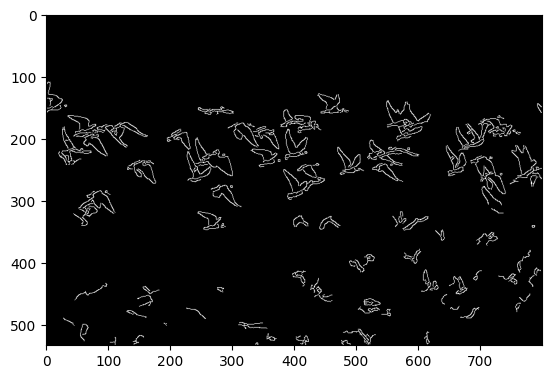

In [46]:
plt.imshow(edges, cmap='gray')


Processing Flock_of_Birds_(7175071318).jpg

Saved outputs to ../test_sample_opencv_out


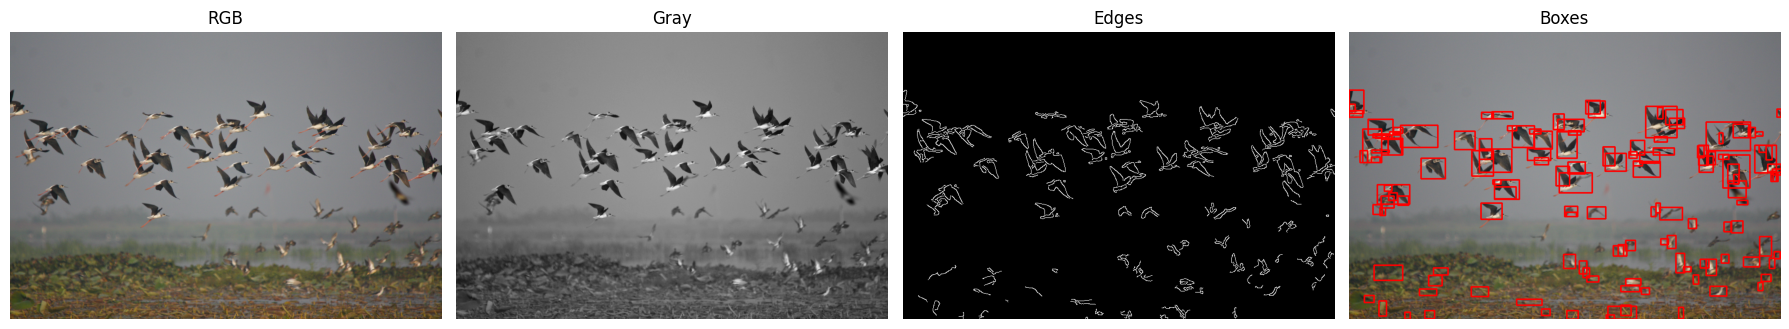

In [5]:
# Process up to 5 images and display results
results = []
for p in img_paths[:5]:
    print('\nProcessing', p.name)
    r = process_image(p, show=True)
    results.append(r)
print('\nSaved outputs to', OUTPUT_DIR)